# Linear Regression

Exploration of simple linear regression based on Portugese white wine data

Reference: Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties, Decision Support Systems, Elsevier, 47(4):547-553, 2009

Description: The data set contains information on 4989 wines. For each wine 11 features (columns) are recorded. The final columns contains the quality of the wine, which corresponds to the target variable.

Possible predictors:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Target variable: quality

## Getting the data

In [1]:
import os
import pandas as pd
import numpy as np

# set the path to the data
csv_path = r"winequality-white.csv"
data = pd.read_csv(csv_path, delimiter=";")

## Have a look at the data structure

In [2]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
print("data shape:", data.shape)

data shape: (4898, 12)


In [4]:
# Split the data into train and test sets

data_np = data.values # transform to numpy array

np.random.shuffle(data_np) # randomly shuffle data

# use first 3000 examples for training
X_train = data_np[:3000,:11] # predictors
y_train = data_np[:3000,11]  # target variable

# and remaining examples for testing
X_test = data_np[3000:,:11] # predictors
y_test = data_np[3000:,11] # target variable

In [5]:
print("shape of train data:", X_train.shape) 
print("shape of test data:", X_test.shape)

shape of train data: (3000, 11)
shape of test data: (1898, 11)


In [6]:
print("length of targets in train data:", y_train.shape[0]) 
print("length of targets in test data:", y_test.shape[0])

length of targets in train data: 3000
length of targets in test data: 1898


## Tasks

Make some plots of the data in order to understand them better. Use the function **plt.hist()** of the package matplotlib to visualize the distribution of each of the predictors for the training data. Plot scatter lots of each feature and the target variable, using the function **plt.scatter()**. Also calculate the amount of correlation (correlation coefficient) between each predictor and the target variable, using the function **np.corrcoef()** of numpy. Which variable seems to have more predictive power?

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']
Feature: fixed acidity
Correlation coefficient: -0.10974296990364714


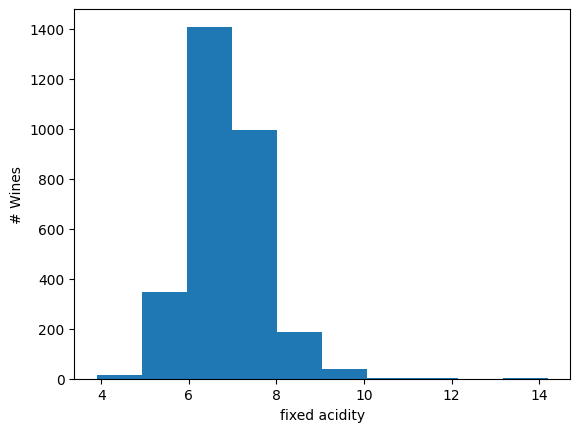

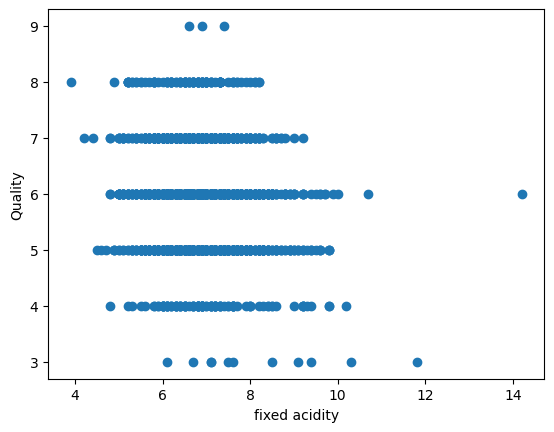

Feature: volatile acidity
Correlation coefficient: -0.1979116343833619


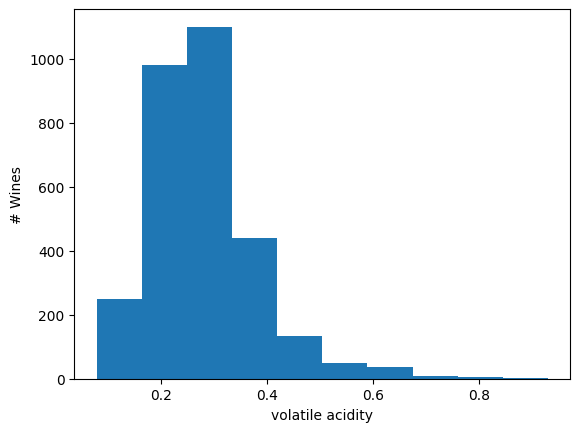

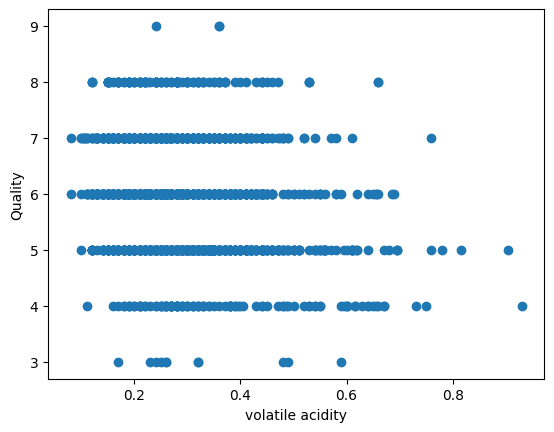

Feature: citric acid
Correlation coefficient: 0.00843689935997116


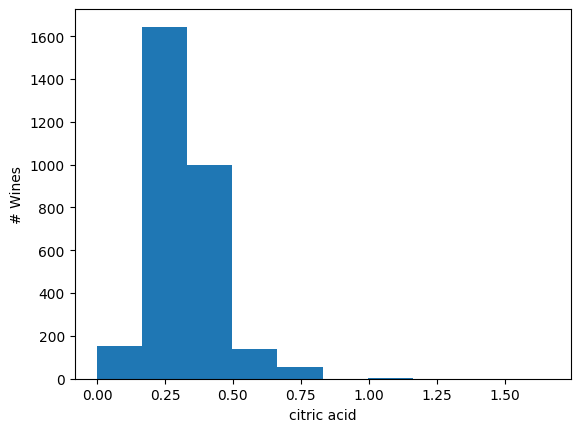

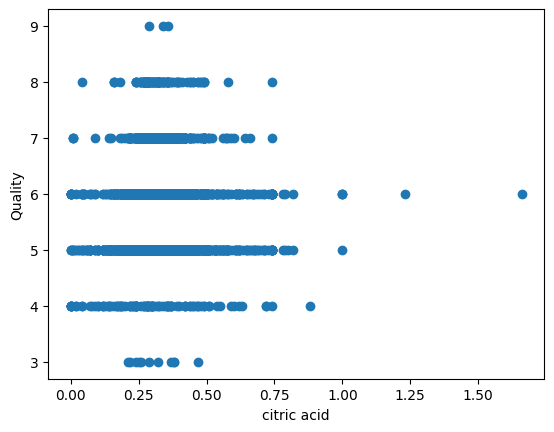

Feature: residual sugar
Correlation coefficient: -0.07378639303229205


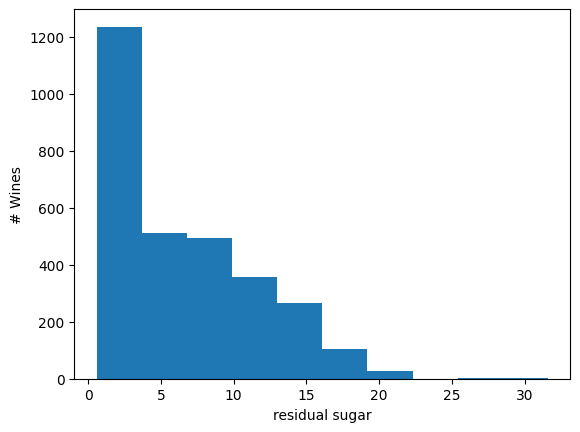

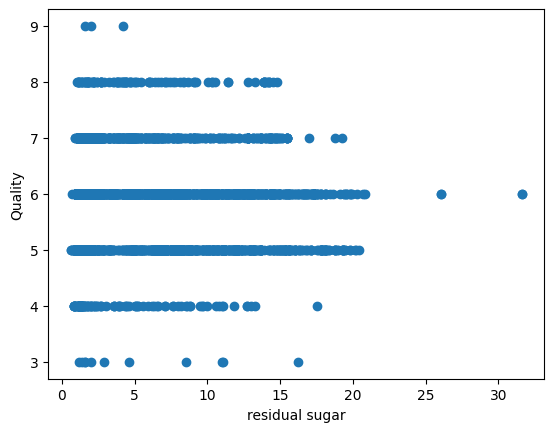

Feature: chlorides
Correlation coefficient: -0.19587431030734462


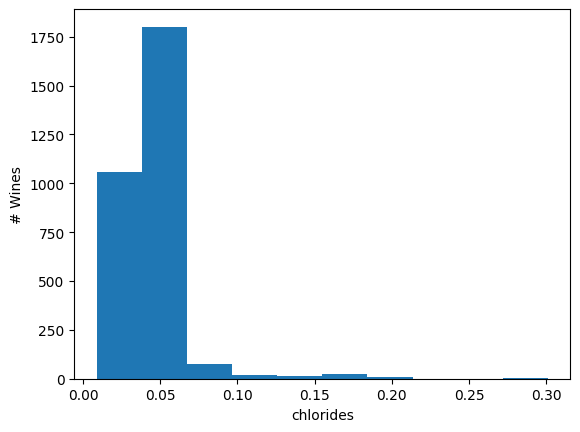

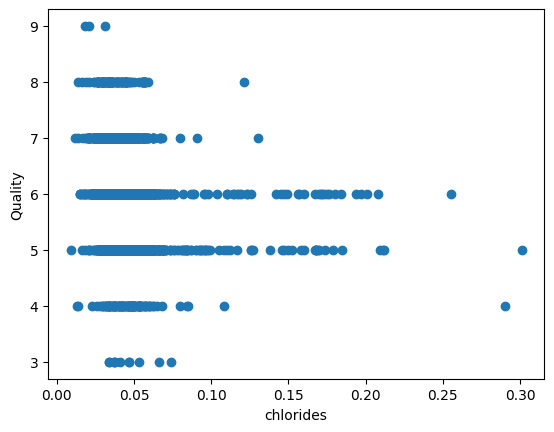

Feature: free sulfur dioxide
Correlation coefficient: 0.008280104815444205


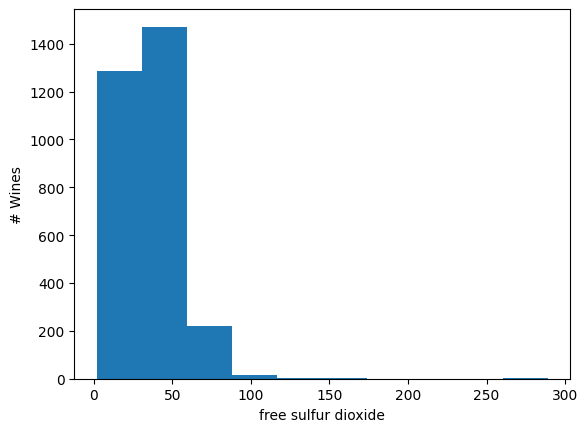

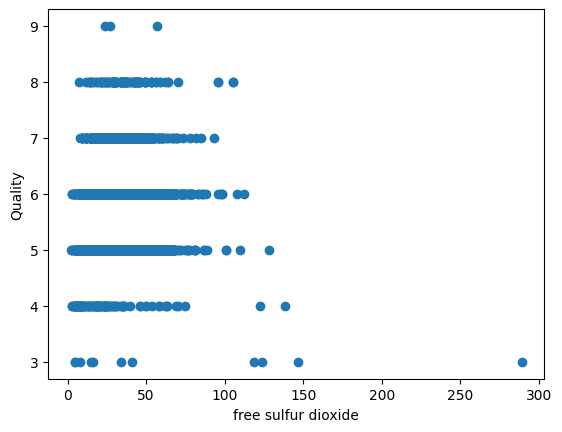

Feature: total sulfur dioxide
Correlation coefficient: -0.1589387390598796


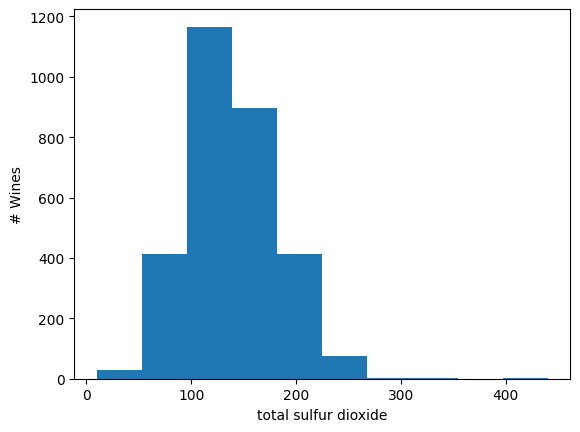

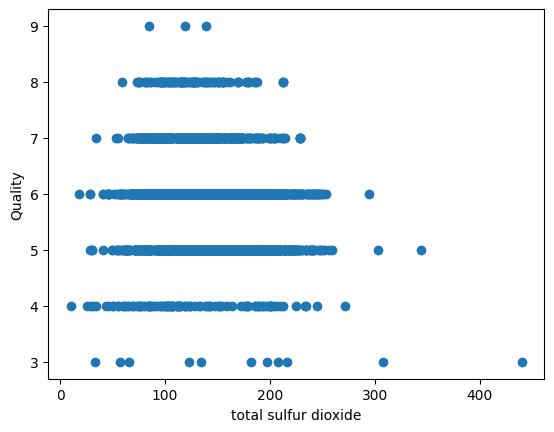

Feature: density
Correlation coefficient: -0.29595536476648515


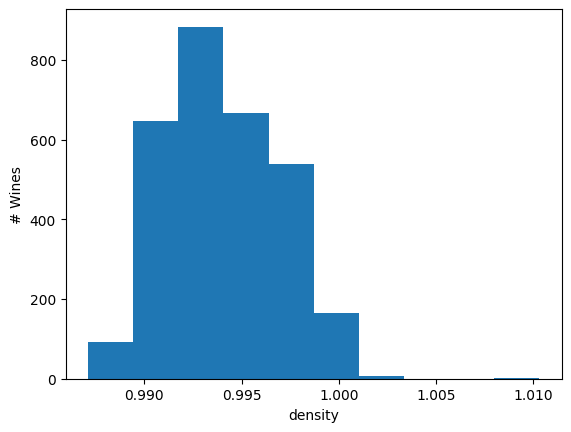

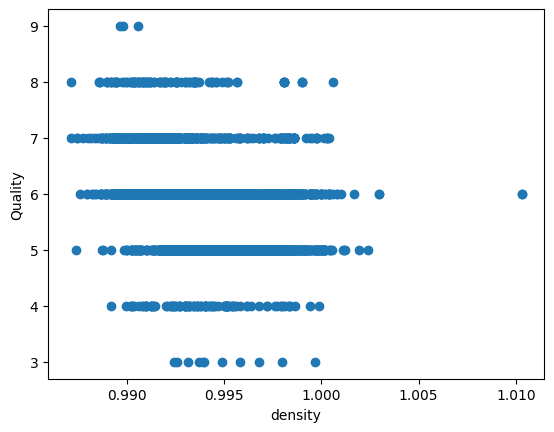

Feature: pH
Correlation coefficient: 0.08347460673768471


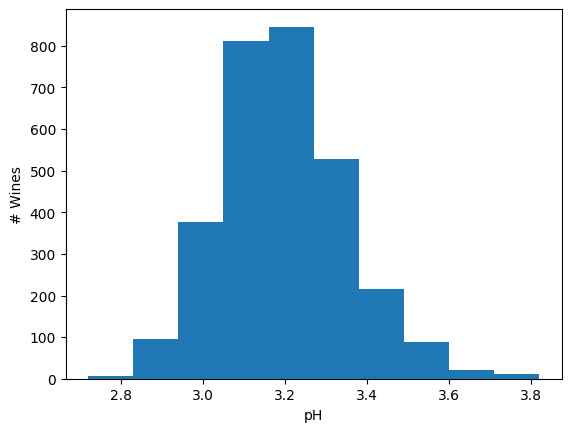

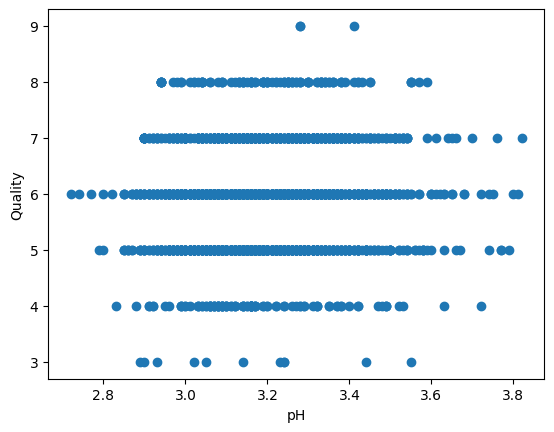

Feature: sulphates
Correlation coefficient: 0.050865581166766705


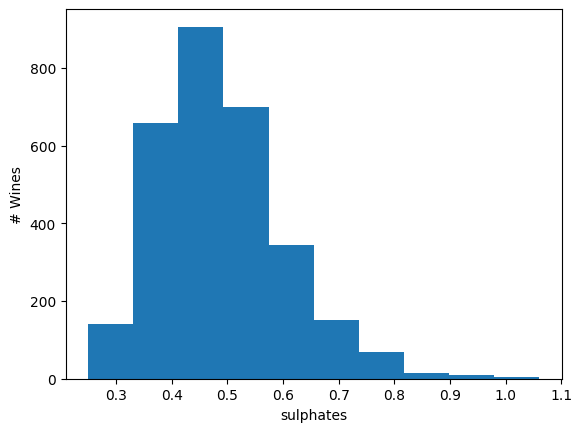

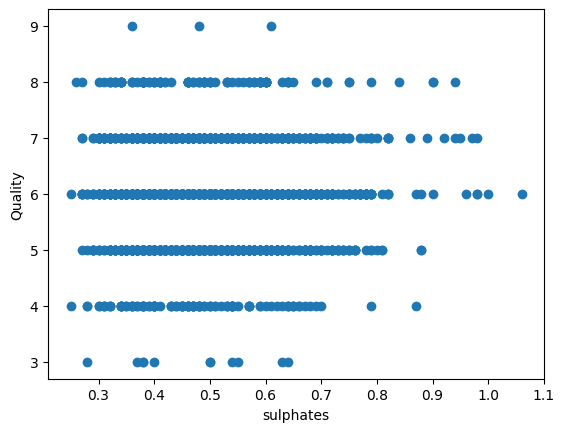

Feature: alcohol
Correlation coefficient: 0.43077519736352227


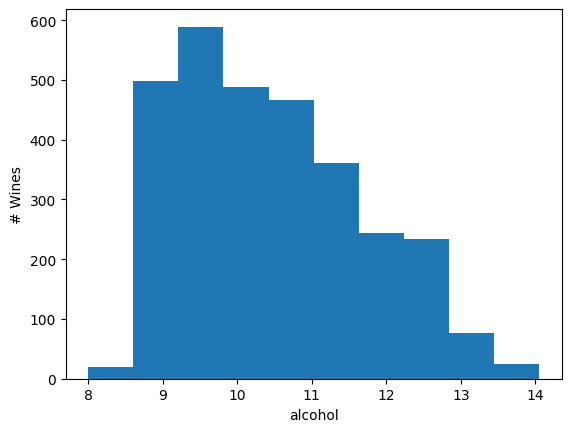

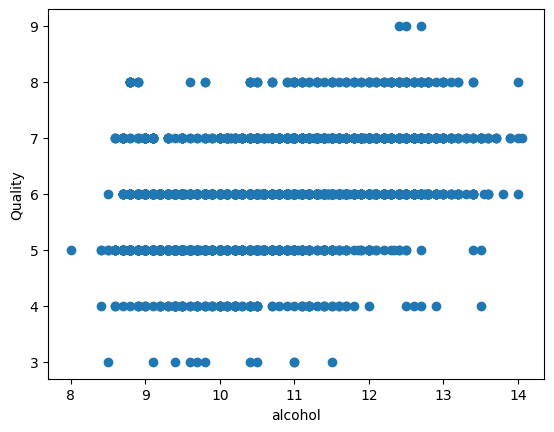

Feature: quality


IndexError: index 11 is out of bounds for axis 1 with size 11

<Figure size 640x480 with 0 Axes>

In [15]:
# Your code here
import matplotlib.pyplot as plt


for index, feature in enumerate(list(data.columns.values)[:-1]):
    plt.clf()
    print("Feature:", feature)
    print(
        "Correlation coefficient:", np.corrcoef(X_train[:, index], y_train)[0, 1]
    )  # Calulate correlation coefficient

    # 1D Histogram
    plt.hist(X_train[:, index])
    plt.xlabel(feature)
    plt.ylabel("# Wines")
    plt.show()

    # Scatter Plot
    plt.scatter(X_train[:, index], y_train)
    plt.xlabel(feature)
    plt.ylabel("Quality")
    plt.show()


Calculate the weights for linear regression. Using ordinary least squares (OLS), one can derive the following  expression:


$$ 
\vec{\bf{w}}= (\bf{X}^T \bf{X})^{-1} \bf{X}^T \vec{\bf{y}}
$$ 

Numpy provides functions for matrix manipulation (https://numpy.org/doc/stable/reference/routines.array-manipulation.html). Here, one can use the following: 

*  **np.matmul** for matrix multiplication
*  **.T** for matrix transposition
*  **np.linalg.inv** for matrix inversion
    

In [8]:
# Your code here

Use the weights to construct a linear model and predict the target variable on the test set. Compare your predictions with the true values of the target variable (ground truth). Calculate the correlation coefficient between predicted and true quality and draw a scatter plot.

In [9]:
# Your code here